## In-class practice for Lecture 17

* Time series analysis: Time domain, frequency domain, spectrum, power spectrum
* New Python tricks: periodogram using scipy.signal
* Answer each question using Python codes in a separate cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.  Time series modeling using NumPy

Consider the example of signals with multiple frequencies used in the lecture:

$$ y(t) = 0.5 + \cos(2\pi t) + \frac{1}{2}\cos(4\pi t) + \frac{1}{3}\cos(6\pi t) + \frac{1}{4}\cos(8\pi t) + + \frac{1}{5}\cos(10\pi t) + \frac{1}{6}\cos(12\pi t)$$

- Write a for-loop to generate the signal $y(t)$ in stead of the way we did in class. Basically what you need to do is to generate a function $y(t)$ with the following form:

$$ y(t) = 0.5+ \Sigma_{n=1}^{6} \frac{1}{n}\cos(n\cdot 2\pi t)$$

- Now increase the number of frequencies in the above function $y(t)$ from 6 to 12, 60 and 300, what do you get?

The code used in class is listed below:


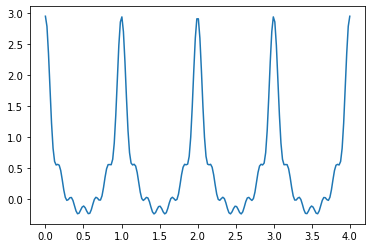

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array(range(1,7))

freq = n
magn = 1/n

t = np.linspace(0,4,200)

# start your code here:
y = 0.5
for i,j in zip(freq,magn):
    y = y + j*np.cos(2*np.pi*i*t)
    
plt.plot(t,y)
plt.show()

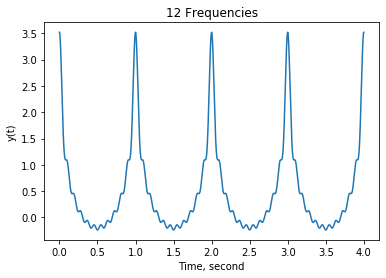

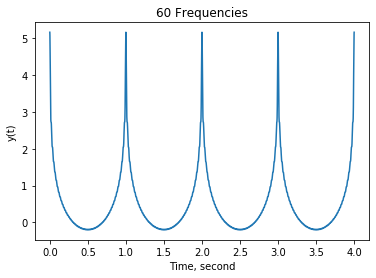

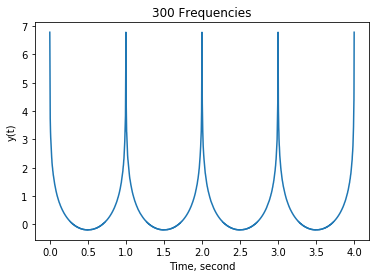

In [3]:
for n_max in [12,60,300]:

    n = np.array(range(1,n_max))

    freq = n
    magn = 1/n

    t = np.linspace(0,4,40000) # here i'm using 40k points, why?

    y = 0.5
    for i,j in zip(freq,magn):
        y = y + j*np.cos(2*np.pi*i*t)
    
    plt.plot(t,y)
    plt.xlabel('Time, second')
    plt.ylabel('y(t)')
    plt.title(str(n_max)+' Frequencies')
    plt.show()

### 2.  Periodogram for Eccentricity and Obliquity

Import the dataset discussed in class named "INSOLN.LA2004.BTL.100.csv" into Python as a Pandas data frame. Let's focus on the data at last 1000 ka (filter your data frame by ['Age (ka)']<1000 )

- According to the "Age" column, What is the data sampling cadence $\Delta t$ (in ka) in the dataset?
- What is the sampling frequence $f_s$ of the data set?
- Plot the Eccentricity as a function of time
- Generate a periodogram for the Eccentricity and find out the peak frequency $f_{peak}$ in the power spectrum
- What's the variation period of Eccentricity (in ka) according to the $f_{peak}$ you found in the periodogram?

In [4]:
cycles=pd.read_csv('../Datasets/INSOLN.LA2004.BTL.100.csv')
cycles = cycles[cycles['Age (ka)']<1000]
print (cycles.columns)
cycles.head()

Index(['Age (ka)', 'Eccentricity', 'Obliquity', 'Precession'], dtype='object')


,Age (ka),Eccentricity,Obliquity,Precession
0,0,0.016702,0.409093,1.796257
1,1,0.017161,0.411353,1.497928
2,2,0.017497,0.413555,1.200024
3,3,0.017846,0.415639,0.903494
4,4,0.018211,0.417555,0.611381


In [5]:
dt = cycles['Age (ka)'].iloc[1]-cycles['Age (ka)'].iloc[0] # sampleing cadence
print('The sampling cadence $\Dalta T$ is',dt,'ka')

fs = 1/dt
print('The sampling frequency $f_s$ is',fs,'ka^{-1}')

The sampling cadence $\Dalta T$ is 1 ka
The sampling frequency $f_s$ is 1.0 ka^{-1}


Text(0.5, 1.0, 'Eccentricity')

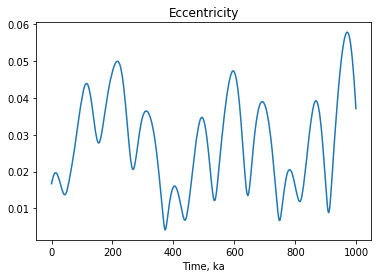

In [6]:
plt.plot(cycles['Age (ka)'],cycles['Eccentricity'])
plt.xlabel('Time, ka')
plt.title('Eccentricity')

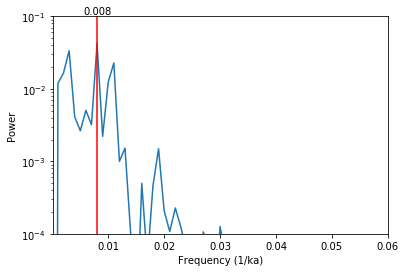

In [7]:
from scipy import signal

# make an array out of the desired data series
ecce=np.array(cycles['Eccentricity'])
time = np.array(cycles['Age (ka)'])
fs = 1/(time[1]-time[0])

# and calculate the frequencies 
ecce_freqs,ecce_power=signal.periodogram(ecce,fs)
# plot on a linear x, log y plot (using semilogy( ))
plt.semilogy(ecce_freqs,ecce_power)

plt.ylim(.0001,.1) # truncate the Y axis - otherwise the figure looks very ugly
plt.xlim(.0001,.06) # truncate the X axis

plt.axvline(x=1./125.,color='red')  # use a vertical line
plt.xlabel('Frequency (1/ka)') # label the axes
plt.ylabel('Power')
plt.text(1./125.,0.1,'0.008',ha='center',va='bottom')
plt.show()

In [8]:
print('the peak periodicity in eccentricity is',1/0.008,'ka')

the peak periodicity in eccentricity is 125.0 ka


### 3. Temporal variation of CO2 concentration

Download the data file "Monthly_CO2_Concentrations.xlsx" from Moodle

- load the excel file into Python as a data frame
- plot the CO2 concentration as a function of months (here the data sampling cadence is one month, so you can just plot the CO2 concentration using the default Pandas index)
- Generate a periodogram for the CO2 concentration data
- What kind of frequency components do you find? periodicity of variations?

   Unnamed: 0     CO2  Year  Month
0           0  333.13  1974      5
1           1  332.09  1974      6
2           2  331.10  1974      7
3           3  329.14  1974      8
4           4  327.36  1974      9


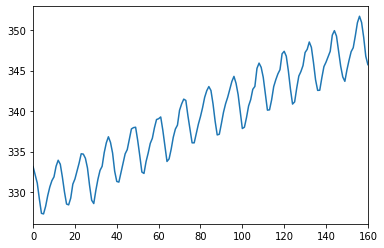

In [9]:
co2=pd.read_excel('../Datasets/Monthly_CO2_Concentrations.xlsx')
print(co2.head())
co2['CO2'].plot()

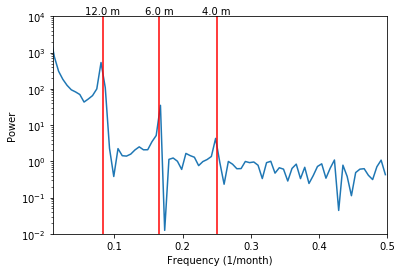

In [10]:
# generate a periodogram, you need y[n] and fs
y = np.array(co2['CO2'])
fs = 1 # month^(-1)

freqs,power=signal.periodogram(y,fs) # calculate periodogram
plt.semilogy(freqs,power) # plot power specturm

plt.ylim(.01,10000) # truncate the Y axis - otherwise the figure looks very ugly
plt.xlim(.01,.5) # truncate the X axis

plt.xlabel('Frequency (1/month)') # label the axes
plt.ylabel('Power')

# now let's make estimations of peak frequencies
# what i see here is three main components: f = 0.83,0.16,0.25
for peak in [0.0833,0.166,0.250]:
    plt.axvline(x=peak,color='red')  # use a vertical line
    plt.text(peak,10000,str(round(1/peak,1))+' m',ha='center',va='bottom')

so roughly speaking, there are three periodicities in the CO2 data set, corresponding to 12 months (f = 0.833), 6 months (f = 0.166) and 4 months (f = 0.25). Why?